<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Nov24-25/Digit_Recognition_BRM_McLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Conjunto de entrenamiento
tr = pd.read_csv('/content/drive/MyDrive/Machine_Learn/train.csv')
tr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
tr.shape

(42000, 785)

In [7]:
#Conjunto de Prueba
te = pd.read_csv('/content/drive/MyDrive/Machine_Learn/test.csv')
te.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
te.shape

(28000, 784)

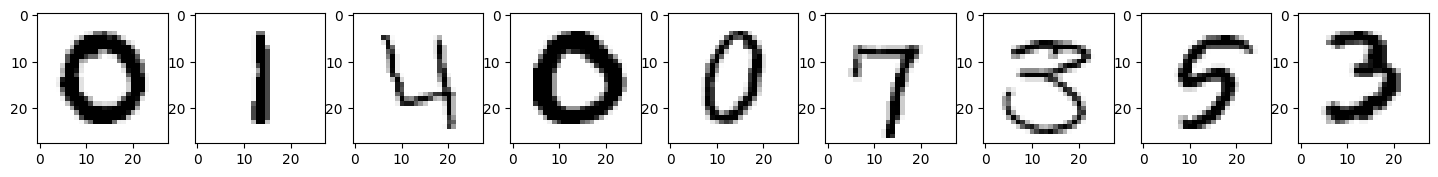

In [9]:
plt.figure(figsize=(20,20))
for i in range(1,10):
    q=tr.iloc[i:i+1,1:].values
    plt.subplot(10,10,i)
  #Assuming these are square images
  #sqrt of 784 is 28
    plt.imshow(q.reshape(28,28),cmap=plt.cm.binary)

In [18]:
# Cargar los datos
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redefinir las imágenes como vectores
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)



### Modelo 1

In [24]:
# Modelo 1: Red Neuronal con 1 capa oculta
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(70, activation='sigmoid'),
    Dense(35, activation='sigmoid')  # Segunda capa
])
# Compilar modelo
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

# Entrenar modelo
model1.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluar modelo en el conjunto de prueba
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 70)                54950     
                                                                 
 dense_15 (Dense)            (None, 35)                2485      
                                                                 
Total params: 57435 (224.36 KB)
Trainable params: 57435 (224.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7960 - accuracy: 0.6302 - val_loss: 1.0913 - val_accuracy: 0.8367
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.8759 - accuracy: 0.8246 - val_loss: 0.6294 - val_accuracy:

### Modelo 2

In [26]:
# Modelo 2: Red Neuronal con 2 capas ocultas
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(70, activation='sigmoid'),
    Dense(35, activation='relu'),
    Dense(17, activation='softmax')
])
# Compilar modelo
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# Entrenar modelo
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)
# Evaluar modelo en el conjunto de prueba
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy2 * 100:.2f}%")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 70)                54950     
                                                                 
 dense_20 (Dense)            (None, 35)                2485      
                                                                 
 dense_21 (Dense)            (None, 17)                612       
                                                                 
Total params: 58047 (226.75 KB)
Trainable params: 58047 (226.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.5580 - accuracy: 0.5954 - val_loss: 0.7993 - val_accuracy: 0.8158
Epoc

### Modelo tres usando

In [27]:
# Modelo 3: Red Neuronal con sklearn MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=5, random_state=1)
mlp_model.fit(x_train_flat, y_train)
y_pred_mlp = mlp_model.predict(x_test_flat)
accuracy_model3 = accuracy_score(y_test, y_pred_mlp)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
print(f"\nTest Accuracy: {accuracy_model3 * 100:.2f}%")


Test Accuracy: 97.16%


Comparación

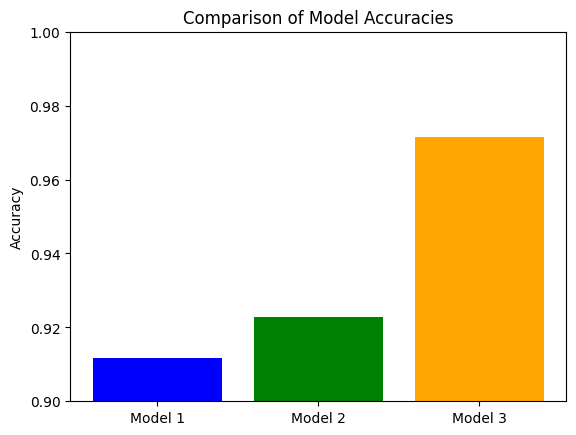

In [30]:
# Graficar comparación de precisión
models = ['Model 1', 'Model 2', 'Model 3']
accuracies = [test_accuracy, test_accuracy2, accuracy_model3]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim([0.9, 1.0])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()